# Ejemplo de poisson

In [1]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(65)

# Number of observations
n = 1000

# Generate 5 explanatory variables from an exponential distribution
X1 = np.random.normal(0,5,n)
X2 = np.random.normal(2,5,n)
X3 = np.random.normal(-4,3,n)
X4 = np.random.normal(10,1,n)
X5 = np.random.normal(8,2,n)

# Combine into a single array
X = np.column_stack([X1, X2, X3, X4, X5])

# Coefficients for the Poisson regression
beta = np.random.uniform(-3,3,5)

# Linear predictor (log-link function)
eta = X.dot(beta)

# Poisson response variable
y = np.random.poisson(lam=np.exp(eta))

# Combine into a DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
data['y'] = y

# Display the first few rows of the DataFrame
print(data.head())


ValueError: lam value too large

In [ ]:
import bambi as bmb
import pandas as pd
import numpy as np
import arviz as az

# Define the custom priors
priors = {
    'X1': bmb.Prior('Normal', mu=0, sigma=1),
    'X2': bmb.Prior('Normal', mu=0, sigma=1),
    'X3': bmb.Prior('Normal', mu=0, sigma=1),
    'X4': bmb.Prior('Normal', mu=0, sigma=1),
    'X5': bmb.Prior('Normal', mu=0, sigma=1),
    'Intercept': bmb.Prior('Normal', mu=0, sigma=1)
}

# Define the model using Bambi with custom priors
model = bmb.Model('y ~ X1 + X2 + X3 + X4 + X5', data, family='poisson')

# Fit the model
fitted_model = model.fit(draws=2000)

# Print the summary of the posterior distributions
print(fitted_model)


In [ ]:
az.summary(fitted_model)

In [ ]:
import numpy as np
import pandas as pd
import bambi as bmb

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
n = 100  # Number of observations
predictor1 = np.random.normal(0, 1, n)
predictor2 = np.random.normal(0, 1, n)
predictor3 = np.random.normal(0, 1, n)
predictor4 = np.random.normal(0, 1, n)
predictor5 = np.random.normal(0, 1, n)

# True coefficients
beta0 = -2.0
beta1 = 0.5
beta2 = -0.3
beta3 = 0.2
beta4 = -0.1
beta5 = 0.1

# Generate Poisson-distributed response variable with low frequency
eta = (beta0 + beta1 * predictor1 + beta2 * predictor2 + beta3 * predictor3 +
       beta4 * predictor4 + beta5 * predictor5)
mu = np.exp(eta)
claims = np.random.poisson(mu)

# Create a DataFrame
data = pd.DataFrame({
    'claims': claims,
    'predictor1': predictor1,
    'predictor2': predictor2,
    'predictor3': predictor3,
    'predictor4': predictor4,
    'predictor5': predictor5
})

# Fit the model with default priors
model = bmb.Model(
    "claims ~ predictor1 + predictor2 + predictor3 + predictor4 + predictor5",
    data=data,
    family="poisson"
)

fitted_model = model.fit(draws=2000)





In [ ]:
# Perform prior predictive checks
ppc = model.prior_predictive(1000)

# Summarize the prior predictive checks
az.summary(ppc)


In [ ]:
az.summary(fitted_model)

In [ ]:
claims

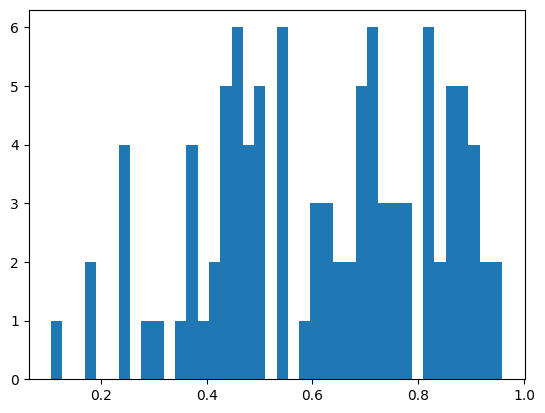

In [2]:
from scipy.special import expit
import matplotlib.pyplot as plt

x = np.random.normal(size=100)
a = 0.5
b = 1

eta = a+x*b

p = expit(eta)

plt.hist(p, bins=40);


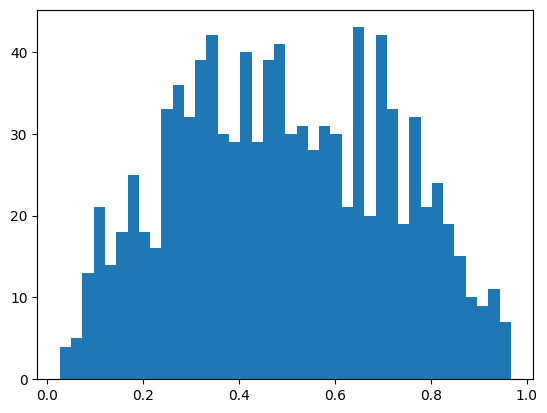

In [3]:
x = 0.5
a = np.random.normal(size = 1000, scale = 1)
b = np.random.normal(size = 1000, scale = 1)

eta = a+x*b

p = expit(eta)

plt.hist(p, bins=40);

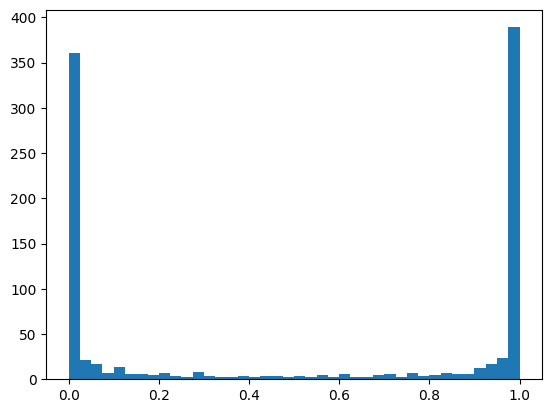

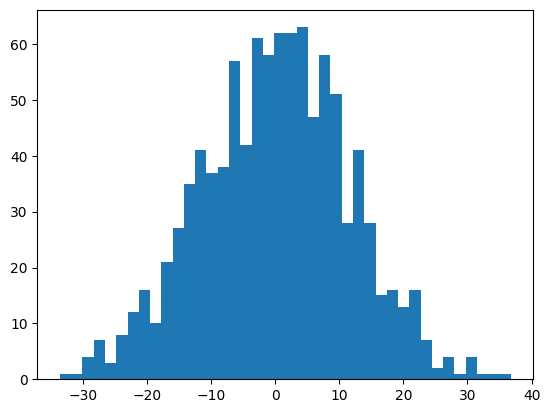

In [4]:
x = 0.5
a = np.random.normal(size = 1000, scale = 10)
b = np.random.normal(size = 1000, scale = 10)

eta = a+x*b

p = expit(eta)

plt.hist(p, bins = 40);
plt.show()
plt.hist(eta, bins = 40);